# Tensor Type

In [128]:
from colorama import Fore
import numpy as np
import torch
import matplotlib.pyplot as plt

In [45]:
print(torch.finfo(torch.float16))

finfo(resolution=0.001, min=-65504, max=65504, eps=0.000976562, smallest_normal=6.10352e-05, tiny=6.10352e-05, dtype=float16)


In [52]:
# initialize a tensor with dtype
tensor = torch.randn(3, 3, dtype=torch.float64)
print(Fore.YELLOW + "tensor: ", tensor)
print(f'{Fore.GREEN}type: {tensor.dtype}')

tensor:  tensor([[ 1.0581,  1.1815, -0.1524],
        [-0.3225, -0.2422, -0.3847],
        [-0.7268, -0.6225,  1.4781]], dtype=torch.float64)
type: torch.float64


In [53]:
# convert to float16
tensor = tensor.to(torch.float16)
print(f'{Fore.GREEN}type: {tensor.dtype}')


type: torch.float16


In [58]:
# send tensor to GPU for M1
if torch.backends.mps.is_available():
    if torch.backends.mps.is_built():
        print(f'{Fore.GREEN}MPS is available and built')
        tensor = tensor.to('mps')
        print(f'{Fore.GREEN}type: {tensor.dtype}')
        print(f'{Fore.GREEN}device: {tensor.device}')
        print(f'{Fore.YELLOW}tensor: {tensor}')

MPS is available and built
type: torch.float16
device: mps:0
tensor: tensor([[ 1.0586,  1.1816, -0.1525],
        [-0.3225, -0.2422, -0.3848],
        [-0.7271, -0.6226,  1.4785]], device='mps:0', dtype=torch.float16)


In [76]:
np_array = np.array([[1,2],
                     [3,4]])
np_tensor = torch.from_numpy(np_array)
print(np_tensor.type())
again_np_array = np_tensor.numpy()
print(type(again_np_array))

torch.LongTensor
<class 'numpy.ndarray'>


In [80]:
zero_tesnor = torch.zeros_like(tensor)
zero_tesnor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='mps:0', dtype=torch.float16)

In [95]:
x = torch.rand(3, 3, dtype=torch.float64)
y = torch.rand(3, 3, dtype=torch.float64)
z = torch.add(x, y)
print(f'{Fore.YELLOW}Added Tensor: {z}')

Added Tensor: tensor([[0.8591, 0.2347, 1.4125],
        [1.8977, 0.8411, 1.0812],
        [0.4850, 0.4350, 1.3346]], dtype=torch.float64)


In [100]:
m = torch.max(z)
m.item()

1.8977360135092383

In [103]:
cat_tensor = torch.cat((x, y), dim=1)
print(f'{Fore.YELLOW}Added Tensor: {cat_tensor}')

Added Tensor: tensor([[0.4864, 0.1316, 0.5228, 0.3727, 0.1031, 0.8897],
        [0.9674, 0.3182, 0.0985, 0.9303, 0.5229, 0.9827],
        [0.3577, 0.3143, 0.8462, 0.1273, 0.1207, 0.4884]], dtype=torch.float64)


In [107]:
print(cat_tensor[:, :2]) 

tensor([[0.4864, 0.1316],
        [0.9674, 0.3182],
        [0.3577, 0.3143]], dtype=torch.float64)


In [111]:
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        tensor = self.flatten(x)
        return tensor
    

img = torch.rand(3, 3)     
net = Net()
output = net(img)
print(output) 


tensor([[0.0216, 0.1675, 0.7990],
        [0.9553, 0.7694, 0.9403],
        [0.0207, 0.1886, 0.4844]])


In [124]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.nn = nn.Linear(input_size, num_classes)
        print(f'{Fore.GREEN}Weights Matrix: {self.nn.weight}')
        print(f'{Fore.RED}Bias Matrix: {self.nn.bias}')
        
    def forward(self, x):
        output = self.nn(x)
        return output
    
x = torch.rand(3, 4)
print(f'{Fore.YELLOW}Input Tensor: {x}')   
model = NeuralNet(4, 2)
output = model(x)
print(output)

Input Tensor: tensor([[0.9779, 0.6654, 0.6634, 0.6763],
        [0.9086, 0.4428, 0.2012, 0.9705],
        [0.1821, 0.2402, 0.4939, 0.6905]])
Weights Matrix: Parameter containing:
tensor([[-0.2920, -0.1652,  0.2720,  0.1566],
        [-0.0512,  0.4544,  0.2939,  0.2550]], requires_grad=True)
Bias Matrix: Parameter containing:
tensor([-0.1627, -0.1798], requires_grad=True)
tensor([[-0.2718,  0.4399],
        [-0.2945,  0.2814],
        [-0.0131,  0.2412]], grad_fn=<AddmmBackward0>)


In [133]:
tensor_x = torch.arange(-4, 4, step=0.1, dtype=torch.float32)
print(f'{Fore.BLUE}Input Tensor: {tensor_x}')
activation = nn.Sigmoid()
output = activation(tensor_x)
print(f'{Fore.YELLOW}Sigmoid Output: {output}')

Input Tensor: tensor([-4.0000, -3.9000, -3.8000, -3.7000, -3.6000, -3.5000, -3.4000, -3.3000,
        -3.2000, -3.1000, -3.0000, -2.9000, -2.8000, -2.7000, -2.6000, -2.5000,
        -2.4000, -2.3000, -2.2000, -2.1000, -2.0000, -1.9000, -1.8000, -1.7000,
        -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000, -1.0000, -0.9000,
        -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000, -0.2000, -0.1000,
         0.0000,  0.1000,  0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,
         0.8000,  0.9000,  1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,
         1.6000,  1.7000,  1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,
         2.4000,  2.5000,  2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,
         3.2000,  3.3000,  3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000])
Sigmoid Output: tensor([0.0180, 0.0198, 0.0219, 0.0241, 0.0266, 0.0293, 0.0323, 0.0356, 0.0392,
        0.0431, 0.0474, 0.0522, 0.0573, 0.0630, 0.0691, 0.0759, 0.0832, 0.0911,
        0

In [134]:
activation_relu = nn.LeakyReLU()
output_relu = activation_relu(tensor_x)
print(f'{Fore.YELLOW}ReLU Output: {output_relu}')

ReLU Output: tensor([-4.0000e-02, -3.9000e-02, -3.8000e-02, -3.7000e-02, -3.6000e-02,
        -3.5000e-02, -3.4000e-02, -3.3000e-02, -3.2000e-02, -3.1000e-02,
        -3.0000e-02, -2.9000e-02, -2.8000e-02, -2.7000e-02, -2.6000e-02,
        -2.5000e-02, -2.4000e-02, -2.3000e-02, -2.2000e-02, -2.1000e-02,
        -2.0000e-02, -1.9000e-02, -1.8000e-02, -1.7000e-02, -1.6000e-02,
        -1.5000e-02, -1.4000e-02, -1.3000e-02, -1.2000e-02, -1.1000e-02,
        -1.0000e-02, -9.0000e-03, -8.0000e-03, -7.0000e-03, -6.0000e-03,
        -5.0000e-03, -4.0000e-03, -3.0000e-03, -2.0000e-03, -1.0000e-03,
         0.0000e+00,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7

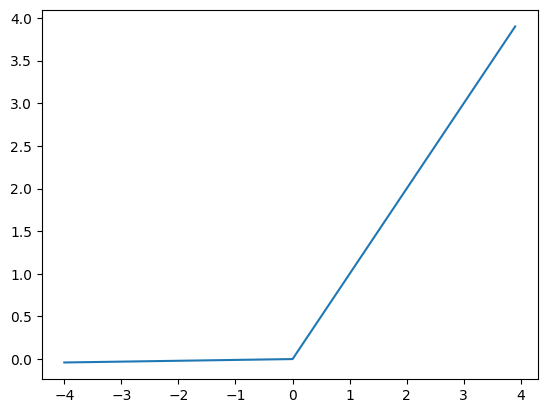

In [135]:
plt.plot(tensor_x.numpy(), output_relu.numpy())
plt.show()

In [136]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.nn = nn.Linear(input_size, num_classes)
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        output = self.activation(self.nn(x))
        return output
    
x = torch.randint(0, 10, (3, 4), dtype=torch.float32)
print(f'{Fore.YELLOW}Input Tensor: {x}')   
model = NeuralNet(4, 2)
output = model(x)
print(output)

Input Tensor: tensor([[8., 7., 5., 7.],
        [7., 9., 6., 3.],
        [8., 7., 1., 4.]])
tensor([[0.0183, 0.0068],
        [0.0178, 0.0369],
        [0.0719, 0.0136]], grad_fn=<SigmoidBackward0>)


In [142]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes, hidden_layers = 10, layer_size = 5):
        super().__init__()
        self.deep = nn.Sequential()
        for i in range(hidden_layers):
            self.deep.add_module(f'ff{i}', nn.Linear(input_size, layer_size))
            self.deep.add_module(f'activation{i}', nn.ReLU())
            input_size = layer_size
        self.deep.add_module(f'Output Layer', nn.Linear(input_size, num_classes))    
        
    def forward(self, x):
        output = self.deep(x)
        return output
    
x = torch.randint(0, 10, (3, 4), dtype=torch.float32)
print(f'{Fore.YELLOW}Input Tensor: {x}')   
model = NeuralNet(4, 2)
output = model(x)
print(output)

Input Tensor: tensor([[5., 7., 1., 3.],
        [6., 4., 7., 4.],
        [8., 4., 0., 2.]])
tensor([[0.0051, 0.3134],
        [0.0051, 0.3132],
        [0.0052, 0.3130]], grad_fn=<AddmmBackward0>)


In [143]:
model

NeuralNet(
  (deep): Sequential(
    (ff0): Linear(in_features=4, out_features=5, bias=True)
    (activation0): ReLU()
    (ff1): Linear(in_features=5, out_features=5, bias=True)
    (activation1): ReLU()
    (ff2): Linear(in_features=5, out_features=5, bias=True)
    (activation2): ReLU()
    (ff3): Linear(in_features=5, out_features=5, bias=True)
    (activation3): ReLU()
    (ff4): Linear(in_features=5, out_features=5, bias=True)
    (activation4): ReLU()
    (ff5): Linear(in_features=5, out_features=5, bias=True)
    (activation5): ReLU()
    (ff6): Linear(in_features=5, out_features=5, bias=True)
    (activation6): ReLU()
    (ff7): Linear(in_features=5, out_features=5, bias=True)
    (activation7): ReLU()
    (ff8): Linear(in_features=5, out_features=5, bias=True)
    (activation8): ReLU()
    (ff9): Linear(in_features=5, out_features=5, bias=True)
    (activation9): ReLU()
    (Output Layer): Linear(in_features=5, out_features=2, bias=True)
  )
)

In [145]:
predictions = torch.rand(2, requires_grad=True)
print(f'{Fore.YELLOW}Predictions: {predictions}')
labels = torch.rand(2)
print(f'{Fore.BLUE}Labels: {labels}')

mae_loss = abs(labels - predictions).sum()/labels.shape[0]
print(f'{Fore.RED}MAE Loss: {mae_loss}')

mae_loss = pow((labels - predictions), 2).sum()/labels.shape[0]
print(f'{Fore.RED}MSE Loss: {mae_loss}')

Predictions: tensor([0.5011, 0.6109], requires_grad=True)
Labels: tensor([0.2701, 0.5047])
MAE Loss: 0.16856226325035095
MSE Loss: 0.03230322524905205


In [147]:
l1_loss = nn.L1Loss()
l2_loss = nn.MSELoss()

l1_output = l1_loss(predictions, labels)
#l1_output.backward()
l2_output = l2_loss(predictions, labels)
#l2_output.backward()
print(f'{Fore.RED}L1 Loss: {l1_output}')
print(f'{Fore.RED}L2 Loss: {l2_output}')

L1 Loss: 0.16856226325035095
L2 Loss: 0.03230322524905205


In [156]:
p = torch.rand(3, 5, requires_grad=True)
p

tensor([[0.1102, 0.9711, 0.8715, 0.4572, 0.9048],
        [0.2777, 0.2911, 0.0299, 0.0877, 0.7316],
        [0.5903, 0.8071, 0.1717, 0.2416, 0.8212]], requires_grad=True)

In [166]:
t = torch.tensor([0, 1, 2])
t

tensor([0, 1, 2])

In [167]:
loss = nn.CrossEntropyLoss()
output = loss(p, t)
print(f'{Fore.RED}Cross Entropy Loss: {output}')

Cross Entropy Loss: 1.9491052627563477
